# Objective

The purpose of this notebook is to test the creation of random structures of treewidth K. The idea is to later use these capabilities to generate random structures we will use in our experiments of probabilistic reasoning with LLM.

**Theoretical reminder on treewidth:**

Treewidth computation is NP-hard:

* For a graph with n nodes, there are exponentially many possible tree decompositions
* Finding the optimal (minimum width) tree decomposition requires checking all possibilities
* This becomes computationally infeasible even for moderately sized graphs (>20-30 nodes)


**What NetworkX Actually Does**

NetworkX provides approximation algorithms that give **upper bounds** on the true treewidth:

`treewidth_min_degree():`

* Uses the "minimum degree" heuristic
* Repeatedly removes the node with minimum degree
* Guarantees: true_treewidth ≤ returned_width ≤ true_treewidth * log(n)
* Fast: O(n²) time complexity

`treewidth_min_fill_in():`
* Uses the "minimum fill-in" heuristic
* Tries to minimize edges added during elimination
* Guarantees: Usually better approximation than min-degree
* Slower: O(n³) time complexity

In [1]:
import sys
from pathlib import Path

# Set the base path
base_path = Path("../../")  # One level up from the current working directory

# Add the src/ directory to sys.path using base_path
sys.path.append(str((base_path / "src").resolve()))

from bn_utils import draw_networkx_graph
from graph_generation import generate_dag_with_treewidth

### Simple variable names

> In order to have a different structure we need to change the seed

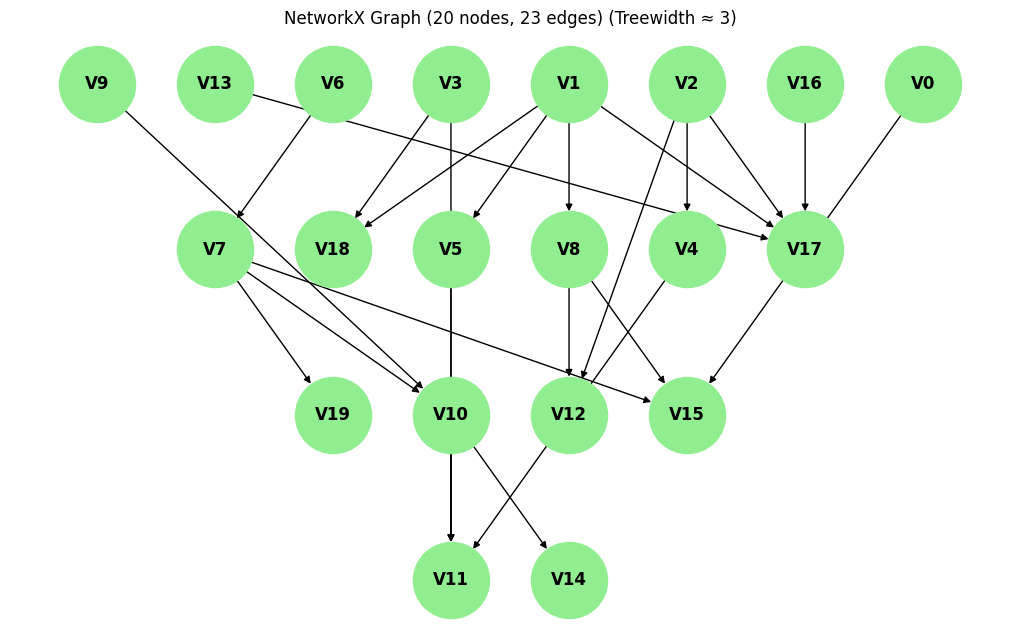

{'positions': {'V9': (-4.0, 0),
  'V13': (-3.0, 0),
  'V6': (-2.0, 0),
  'V3': (-1.0, 0),
  'V1': (0.0, 0),
  'V2': (1.0, 0),
  'V16': (2.0, 0),
  'V0': (3.0, 0),
  'V7': (-3.0, -1),
  'V18': (-2.0, -1),
  'V5': (-1.0, -1),
  'V8': (0.0, -1),
  'V4': (1.0, -1),
  'V17': (2.0, -1),
  'V19': (-2.0, -2),
  'V10': (-1.0, -2),
  'V12': (0.0, -2),
  'V15': (1.0, -2),
  'V11': (-1.0, -3),
  'V14': (0.0, -3)},
 'layers': {'V9': 0,
  'V13': 0,
  'V6': 0,
  'V3': 0,
  'V1': 0,
  'V2': 0,
  'V16': 0,
  'V0': 0,
  'V7': 1,
  'V18': 1,
  'V5': 1,
  'V8': 1,
  'V4': 1,
  'V17': 1,
  'V19': 2,
  'V10': 2,
  'V12': 2,
  'V15': 2,
  'V11': 3,
  'V14': 3},
 'layer_nodes': {0: ['V9', 'V13', 'V6', 'V3', 'V1', 'V2', 'V16', 'V0'],
  1: ['V7', 'V18', 'V5', 'V8', 'V4', 'V17'],
  2: ['V19', 'V10', 'V12', 'V15'],
  3: ['V11', 'V14']},
 'treewidth': {'width': 3,
  'decomposition': <networkx.classes.graph.Graph at 0x737a4b985670>}}

In [2]:
# NOTE: In order to have a different structure we need to change the seed
dag, achieved_treewidth, metadata_dict = generate_dag_with_treewidth(
    n_nodes=20, 
    target_treewidth=3, 
    dag_method='random',
    node_naming='simple',
    # node_naming='confusing',
    seed=50
)
draw_networkx_graph(dag)

### Simple name

Note how we maintain the structure but we change the names with the same seed

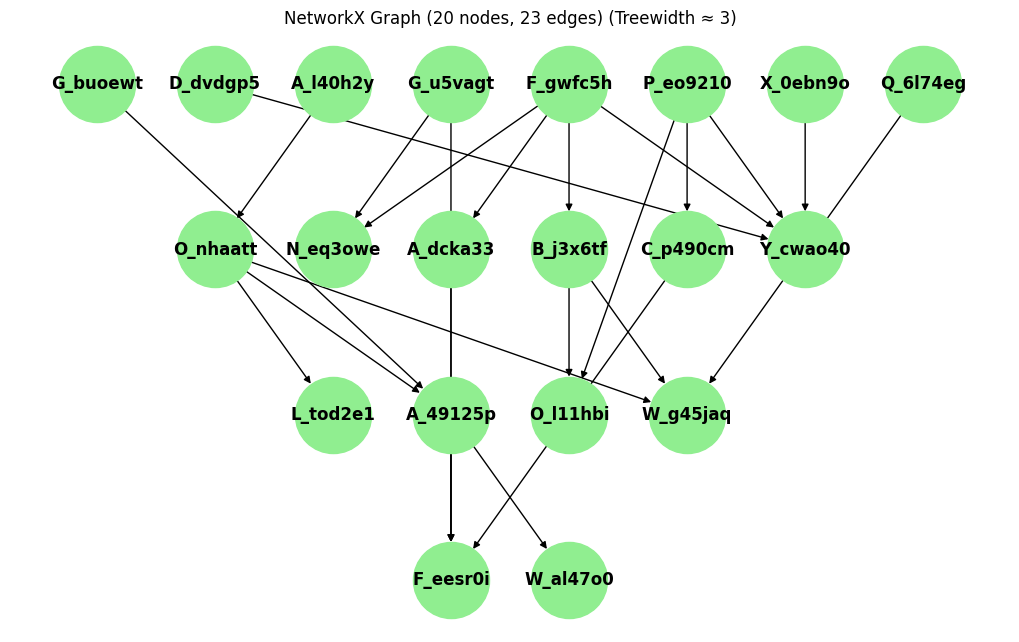

{'positions': {'G_buoewt': (-4.0, 0),
  'D_dvdgp5': (-3.0, 0),
  'A_l40h2y': (-2.0, 0),
  'G_u5vagt': (-1.0, 0),
  'F_gwfc5h': (0.0, 0),
  'P_eo9210': (1.0, 0),
  'X_0ebn9o': (2.0, 0),
  'Q_6l74eg': (3.0, 0),
  'O_nhaatt': (-3.0, -1),
  'N_eq3owe': (-2.0, -1),
  'A_dcka33': (-1.0, -1),
  'B_j3x6tf': (0.0, -1),
  'C_p490cm': (1.0, -1),
  'Y_cwao40': (2.0, -1),
  'L_tod2e1': (-2.0, -2),
  'A_49125p': (-1.0, -2),
  'O_l11hbi': (0.0, -2),
  'W_g45jaq': (1.0, -2),
  'F_eesr0i': (-1.0, -3),
  'W_al47o0': (0.0, -3)},
 'layers': {'G_buoewt': 0,
  'D_dvdgp5': 0,
  'A_l40h2y': 0,
  'G_u5vagt': 0,
  'F_gwfc5h': 0,
  'P_eo9210': 0,
  'X_0ebn9o': 0,
  'Q_6l74eg': 0,
  'O_nhaatt': 1,
  'N_eq3owe': 1,
  'A_dcka33': 1,
  'B_j3x6tf': 1,
  'C_p490cm': 1,
  'Y_cwao40': 1,
  'L_tod2e1': 2,
  'A_49125p': 2,
  'O_l11hbi': 2,
  'W_g45jaq': 2,
  'F_eesr0i': 3,
  'W_al47o0': 3},
 'layer_nodes': {0: ['G_buoewt',
   'D_dvdgp5',
   'A_l40h2y',
   'G_u5vagt',
   'F_gwfc5h',
   'P_eo9210',
   'X_0ebn9o',
   'Q_6l74

In [3]:
# NOTE: In order to have a different structure we need to change the seed
dag, achieved_treewidth, metadata_dict = generate_dag_with_treewidth(
    n_nodes=20, 
    target_treewidth=3, 
    dag_method='random',
    node_naming='confusing',
    # node_naming='simple',
    seed=50
)
draw_networkx_graph(dag)